# 800100715151 Astronomide Veritabanları #

# Final Projesi #

# Korhan Kara #

# 23810105 #

### Teslim Tarihi: 16 Haziran 2024, Pazar 17:30 ###

1. Final ödevinizi üzerinde yapmak üzere biri Simbad ya da Gaia olmak üzere en az iki veritabanı seçiniz.

2. Seçtiğiniz veritabanlarını birlikte kullanabileceğiniz, çözümü için işlenebilir ve görselleştirilebilir veri çıkarabileceğiniz 5 soru tanımlayınız. (20 puan)

3. Tanımladığınız soruların çözümü için veritabanlarına uygun yöntemlerle bağlanınız.(5 puan)

4. Tanımladığınız soruları sorgulara dönüştürerek bu veritabanlarından ihtiyaç duyduğunuz bilgieri çekiniz ve pandas tablolarına aktarınız.(5 puan)

5. Tabloların sütunları için temel istatistiki verileri görüntüleyiniz. (5 puan)

6. Bu istatistiki veriler ve eksik bilgiler temelinde verilerinizi bir ön temizlikten geçirerek tablolarınızı güncelleyiniz. (5 puan)

7. Tablolarınızı pandas'ın uygun fonksiyonlarını (merge, join gibi) kullanarak biraraya getiriniz. (10 puan)

8. Birleştirdiğiniz tabloları tekrar inceleyerek tanımladığınız soruları yanıtlamak üzere ikinci bir temizlik işlemi gerekiyorsa uygulayınız. (5 puan)

9. Tanımladığınız sorulara yanıtlar oluşturacak veriler ve bunlara ilişkin istatistikleri tablolar şeklinde görüntüleyiniz. (15 puan)

10. Tanımladığınız sorulara yanıtlar oluşturacak görselleştirmeler (en az iki eğri ya da saçılma grafiği, en az iki dağılım grafiğinden oluşacak, soru başına en az bir görsel) hazırlayınız. Grafiklerinizin eksen başlıklarının doğru ve tüm eksenlerdeki değerlerle birlikte okunur ve anlaşılır olmasına özen gösteriniz. (20 puan)

11. Tanımladığnız sorular üzerine elde ettiğiniz sonuçlar ve görselleştirmeler temelinde yorumlar yapınız. Ne gibi başka veriler elde edilebilse bu sorunların çözümünde önemli ilerlemeler sağlanabilir? (10 puan)

Astronomide yaygın olarak kullanılan veritabanlarının birer listesi için bkz:
* [Max Planck Astronomical Databases](https://www.mpia.de/en/services/library/astronomical-databases)
* [Royal Astronomical Society, Astronomical databases and archives](https://ras.ac.uk/education-and-careers/for-everyone/126-astronomical-databases-and-archives)
* [Cornell University Clark Physical Sciences Library](https://physicalsciences.library.cornell.edu/astronomy-databases/)
* [wikipedia Category: Astronomical databases](https://en.wikipedia.org/wiki/Category:Astronomical_databases)


Sorgulama için astroquery; istatistik hesabı, tablo oluşturma, veri temizleme ve birleştirme işlemleri için pandas, görselleştirme için matplotlib ya da matlplotlib tabanlı başka python paketlerini (seaborn, ggplot, altair, bokeh, plotly gibi) kullanınız. Ödevinizi bir Jupyter defterine düzenli bir şekilde yaparak sisteme son tarihinden önce yükleyiniz.

Başarılar dilerim.


# Örnek - 5 : "Gezegenimsi Bulutsuların Merkezi Yıldızları"
### Veritabanları: The Strasbourg-ESO Catalogue of Galactic Planetary Nebulae, AAO/UKST SuperCOSMOS H-alpha Survey (SHS), Gaia, SkyView
### Bilimsel Problem: 

Bir ya da birkaç gezegenimsi bulutsunun uzaklıklarının da bulunduğu veritabanındaki gezegenimsi bulutsu uzaklığı ile Gaia'da bu bölgede bulunan ve uzaklığı aynı olan cisimleri eşleştirerek SkyView gibi görüntü sağlayan kataloglardaki gökyüzü görüntüleri üzerinde gösteriniz.

In [8]:
from astropy.coordinates import SkyCoord
from astroquery.skyview import SkyView
from astroquery.simbad import Simbad
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.wcs import WCS
import astropy.units as u
from scipy.stats import gaussian_kde

##### Gezegenimsi bulutsular SİMBAD veritabanı üzerinden sadece distance verisi olanlar filtrelenerek bir csv dosyasına aktarıldı #####

In [4]:
custom_simbad = Simbad()
custom_simbad.TIMEOUT = 1000

custom_simbad.add_votable_fields('main_id', 'ra', 'dec', 'distance', 'flux(V)')

result = custom_simbad.query_criteria(otype='PN')

if result is not None:
    df = result.to_pandas()
    selected_columns = df[['MAIN_ID', 'RA', 'DEC', 'Distance_distance', 'FLUX_V']]
    
    filtered_df = selected_columns.dropna(subset=['Distance_distance', 'FLUX_V'])
    
    filtered_df.to_csv('planetary_nebulae_filtered_w_flux.csv', index=False)
    print("Gezegenimsi bulutsular başarıyla indirildi ve planetary_nebulae_filtered_w_flux.csv dosyasına kaydedildi.")
else:
    print("Hiçbir sonuç bulunamadı.")


Gezegenimsi bulutsular başarıyla indirildi ve planetary_nebulae_filtered_w_flux.csv dosyasına kaydedildi.


Band: DSS2 Blue
Min: 9357.0
Max: 31267.0
Mean: 11461.438
Stdev: 2097.2297
Histogram:
<class 'numpy.ndarray'>
(810000,)

Band: DSS2 Red
Min: 984.0
Max: 22399.0
Mean: 3062.1418
Stdev: 1956.2319
Histogram:
<class 'numpy.ndarray'>
(810000,)

Band: DSS2 IR
Min: 356.0
Max: 25200.0
Mean: 5992.1685
Stdev: 1130.3729
Histogram:
<class 'numpy.ndarray'>
(810000,)



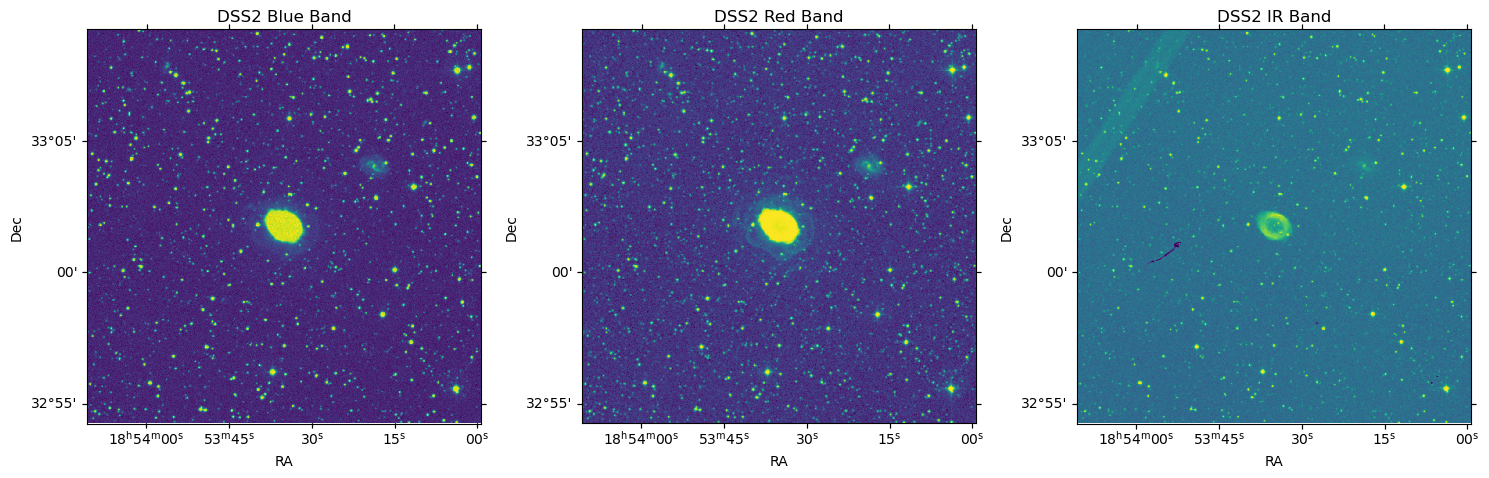

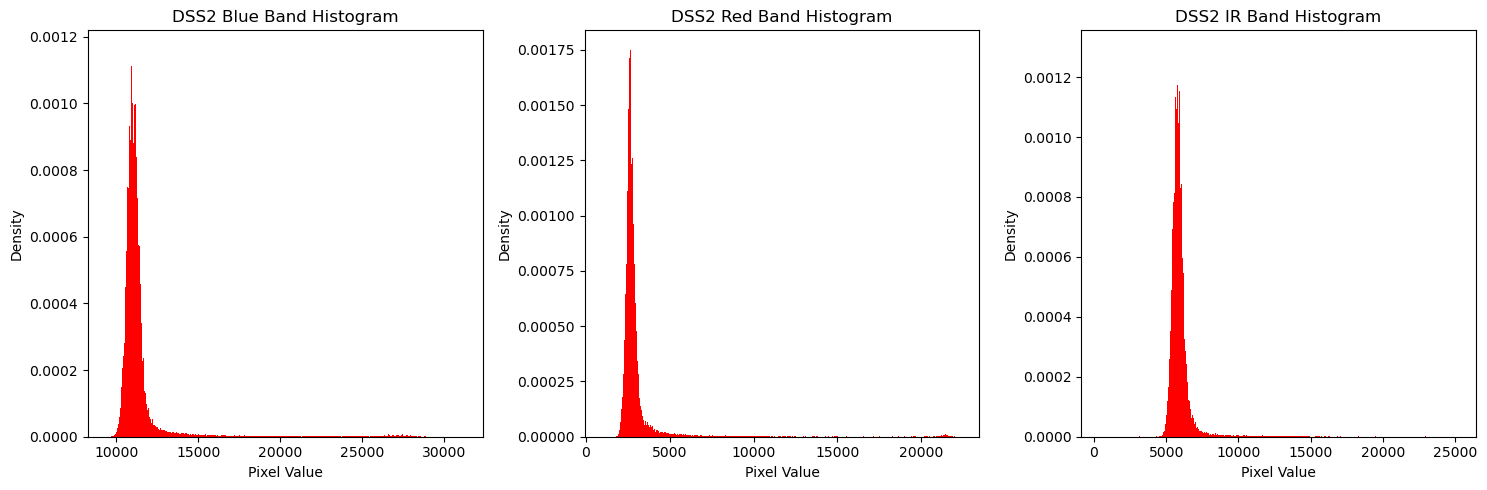

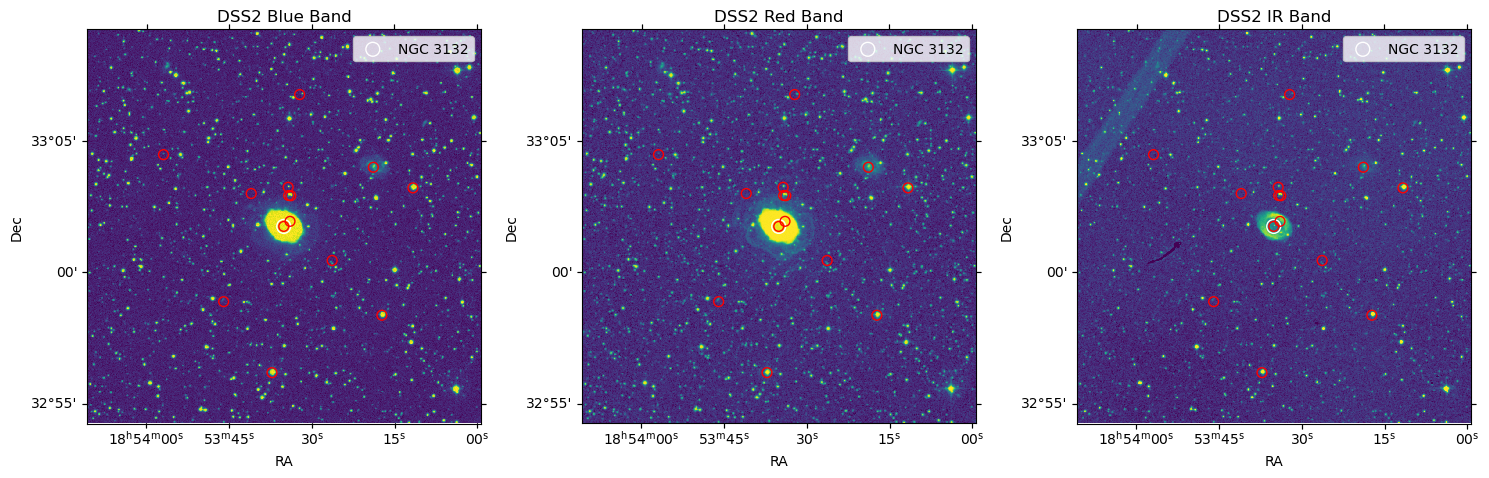

In [1]:
result_table = Simbad.query_object("NGC 6720")
ra = result_table["RA"][0]
dec = result_table["DEC"][0]
distance_result = Simbad.query_object("NGC 6720", wildcard=True, get_query_payload=True)

coordinates = SkyCoord(f"{ra} {dec}", unit=(u.hourangle, u.deg), frame='icrs')

bands = ['DSS2 Blue', 'DSS2 Red', 'DSS2 IR']
images = SkyView.get_images(coordinates, survey=bands, pixels=900)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': WCS(images[0][0].header)})

for ax, image, band in zip(axs, images, bands):
    image_data = image[0].data
    vmin_percentile = np.percentile(image_data, 0.01)
    vmax_percentile = np.percentile(image_data, 99.99)
    ax.imshow(image_data, cmap='viridis', interpolation='none', origin='lower',
              norm=plt.matplotlib.colors.LogNorm(vmin=vmin_percentile, vmax=vmax_percentile))
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
    ax.set_title(f'{band} Band')

    print(f'Band: {band}')
    print('Min:', np.min(image_data))
    print('Max:', np.max(image_data))
    print('Mean:', np.mean(image_data))
    print('Stdev:', np.std(image_data))
    print('Histogram:')
    print(type(image_data.flatten()))
    print(image_data.flatten().shape)
    print()

plt.tight_layout()
plt.show()

fig_hist, axs_hist = plt.subplots(1, 3, figsize=(15, 5))

for ax_hist, image, band in zip(axs_hist, images, bands):
    image_data = image[0].data
    ax_hist.hist(image_data.flatten(), bins='auto', density=True, color='red')
    ax_hist.set_xlabel('Pixel Value')
    ax_hist.set_ylabel('Density')
    ax_hist.set_title(f'{band} Band Histogram')

plt.tight_layout()
plt.show()

radius = 0.1 * u.deg
similar_objects = Simbad.query_region(coordinates, radius=radius)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': WCS(images[0][0].header)})

for ax, image, band in zip(axs, images, bands):
    image_data = image[0].data
    vmin_percentile = np.percentile(image_data, 0.1)
    vmax_percentile = np.percentile(image_data, 99.9)
    ax.imshow(image_data, cmap='viridis', interpolation='none', origin='lower',
              norm=plt.matplotlib.colors.LogNorm(vmin=vmin_percentile, vmax=vmax_percentile))
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
    ax.set_title(f'{band} Band')

    ax.scatter(coordinates.ra.deg, coordinates.dec.deg, transform=ax.get_transform('world'), s=100, edgecolor='white', facecolor='none', label='NGC 3132')
    
    for obj in similar_objects:
        obj_coord = SkyCoord(ra=obj['RA'], dec=obj['DEC'], unit=(u.hourangle, u.deg), frame='icrs')
        ax.scatter(obj_coord.ra.deg, obj_coord.dec.deg, transform=ax.get_transform('world'), s=50, edgecolor='red', facecolor='none')

    ax.legend()

plt.tight_layout()
plt.show()

##### Gezegenimsi bulutsuların merkezi yıldızlarının parlaklık dağılımı nedir? #####

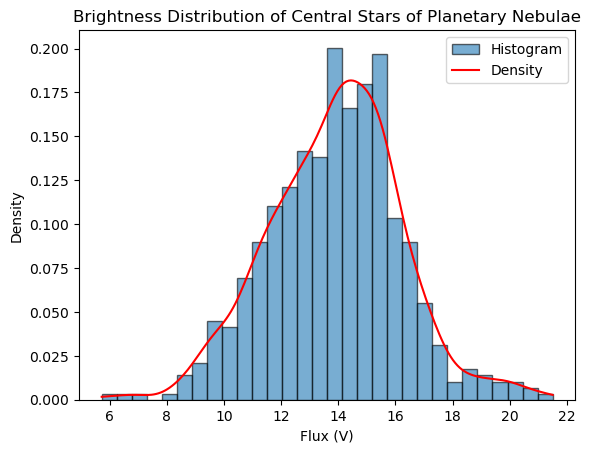

In [10]:
custom_simbad = Simbad()
custom_simbad.TIMEOUT = 1000

custom_simbad.add_votable_fields('main_id', 'ra', 'dec', 'distance', 'flux(V)')

result = custom_simbad.query_criteria(otype='PN')

if result is not None:
    df = result.to_pandas()
    selected_columns = df[['MAIN_ID', 'RA', 'DEC', 'Distance_distance', 'FLUX_V']]
    
    filtered_df = selected_columns.dropna(subset=['Distance_distance', 'FLUX_V'])
    
    flux_values = filtered_df['FLUX_V']
    
    # Create histogram
    plt.hist(flux_values, bins=30, edgecolor='black', density=True, alpha=0.6, label='Histogram')

    # Create density plot
    density = gaussian_kde(flux_values)
    xs = np.linspace(flux_values.min(), flux_values.max(), 200)
    density.covariance_factor = lambda: .25
    density._compute_covariance()
    
    plt.plot(xs, density(xs), label='Density', color='red')
    plt.xlabel('Flux (V)')
    plt.ylabel('Density')
    plt.title('Brightness Distribution of Central Stars of Planetary Nebulae')
    plt.legend()
    plt.show()

##### Gezegenimsi bulutsuların merkezi yıldızlarının akı-uzaklık grafiği #####

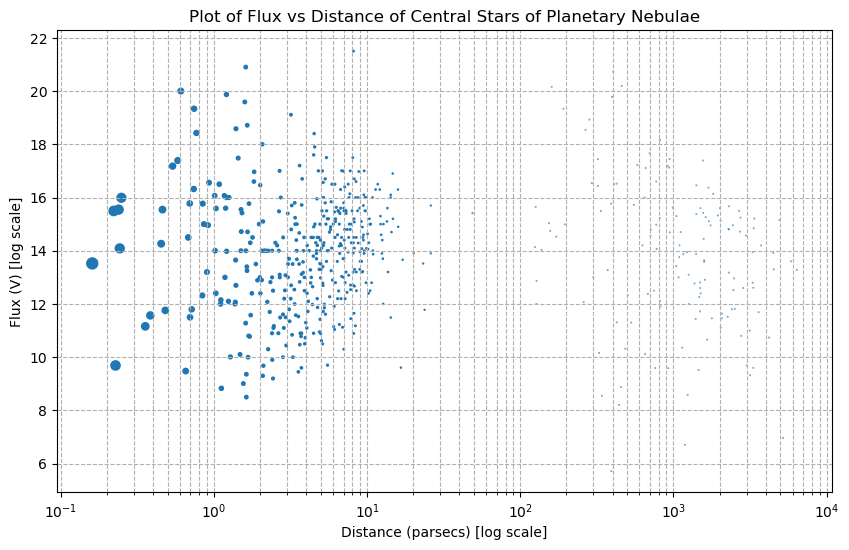

In [28]:
if result is not None:
    df = result.to_pandas()
    selected_columns = df[['MAIN_ID', 'RA', 'DEC', 'Distance_distance', 'FLUX_V']]
    
    filtered_df = selected_columns.dropna(subset=['Distance_distance', 'FLUX_V'])
    
    plt.figure(figsize=(10, 6))
    
    sizes = 1 / filtered_df['Distance_distance'] * 10
    sizes = np.clip(sizes, 0.1, 1000)
    
    plt.scatter(filtered_df['Distance_distance'], filtered_df['FLUX_V'], s=sizes, alpha=1)
    plt.xscale('log')
    plt.xlabel('Distance (parsecs) [log scale]')
    plt.ylabel('Flux (V) [log scale]')
    plt.title('Plot of Flux vs Distance of Central Stars of Planetary Nebulae')
    plt.grid(True, which="both", ls="--")
    plt.show()

C:\Users\korhan\AppData\Local\Temp\ipykernel_26212\1207879471.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Magnitude_V'] = -2.5 * np.log10(filtered_df['FLUX_V'])


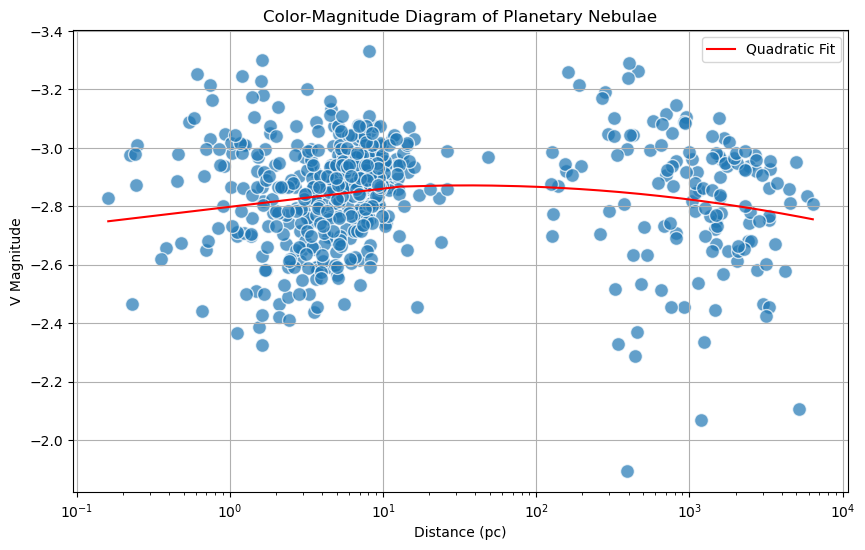

In [11]:
if result is not None:
    df = result.to_pandas()
    selected_columns = df[['MAIN_ID', 'RA', 'DEC', 'Distance_distance', 'FLUX_V']]
    

    filtered_df = selected_columns.dropna(subset=['Distance_distance', 'FLUX_V'])
    
    filtered_df['Magnitude_V'] = -2.5 * np.log10(filtered_df['FLUX_V'])
    
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_df['Distance_distance'], filtered_df['Magnitude_V'], alpha=0.7, edgecolors='w', s=100)
    plt.gca().invert_yaxis()
    plt.xscale('log')
    plt.xlabel('Distance (pc)')
    plt.ylabel('V Magnitude')
    plt.title('Color-Magnitude Diagram of Planetary Nebulae')
    plt.grid(True)
    
    poly_coeffs = np.polyfit(np.log10(filtered_df['Distance_distance']), filtered_df['Magnitude_V'], 2)
    poly = np.poly1d(poly_coeffs)
    
    x_fit = np.linspace(filtered_df['Distance_distance'].min(), filtered_df['Distance_distance'].max(), 500)
    y_fit = poly(np.log10(x_fit))
    plt.plot(x_fit, y_fit, color='red', label='Quadratic Fit')
    plt.legend()
    plt.show()
else:
    print("No data found")

